# Introductory applied machine learning (INFR10069) 

# Lab 5: Clustering, PCA, and Evaluation

In this lab we consider unsupervised learning in the form of clustering methods and principal component analysis (PCA), as well as more thorough performance evaluation of classifiers.

All the datasets that you will need for this lab are located at the `./datasets` directory which is adjacent to this file.

In [33]:
import math
# Import packages
from __future__ import division#, print_function # Imports from __future__ since we're running Python 2
import os
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
def loadDataset(name):
    data_path = os.path.join(os.getcwd(), 'datasets', name + '.csv')
    return pd.read_csv(data_path, delimiter = ',')

## Part 1: Clustering the landsat dataset

We first consider clustering of the Landsat data. For information about the Landsat data you can read [this description](http://www.inf.ed.ac.uk/teaching/courses/dme/html/landsat.html). Since there are 6 classes in the data, it would be interesting to try clustering with k=6 centres...

### ========== Question 1.1 ==========
1. With pandas, read the csv dataset located at './datasets/landsat.csv'
1. Split the data into the features `X` (pandas dataframe), and the labels `y` (easier to make it a numpy array)
1. Give it a once over
    * Get a feel for the size
    * Check it looks ok
    * Understand what the features are
    * Plot the class distribution

In [3]:
landsat = loadDataset('landsat')

In [5]:
# Your code goes here
print len(landsat.columns)
landsat.columns

37


Index([u'pixel1_1', u'pixel1_2', u'pixel1_3', u'pixel1_4', u'pixel2_1',
       u'pixel2_2', u'pixel2_3', u'pixel2_4', u'pixel3_1', u'pixel3_2',
       u'pixel3_3', u'pixel3_4', u'pixel4_1', u'pixel4_2', u'pixel4_3',
       u'pixel4_4', u'pixel5_1', u'pixel5_2', u'pixel5_3', u'pixel5_4',
       u'pixel6_1', u'pixel6_2', u'pixel6_3', u'pixel6_4', u'pixel7_1',
       u'pixel7_2', u'pixel7_3', u'pixel7_4', u'pixel8_1', u'pixel8_2',
       u'pixel8_3', u'pixel8_4', u'pixel9_1', u'pixel9_2', u'pixel9_3',
       u'pixel9_4', u'class'],
      dtype='object')

In [164]:
targetName = landsat.columns[-1]
targetName

'class'

In [165]:
X = landsat.drop(labels=[targetName], axis=1) #for pandas axis=1 means column (in numpy is vice-versa)
X.shape

(4435, 36)

In [166]:
y = landsat[targetName].values
y.shape

(4435,)

In [11]:
X[:10]

,pixel1_1,pixel1_2,pixel1_3,pixel1_4,pixel2_1,pixel2_2,pixel2_3,pixel2_4,pixel3_1,pixel3_2,...,pixel7_3,pixel7_4,pixel8_1,pixel8_2,pixel8_3,pixel8_4,pixel9_1,pixel9_2,pixel9_3,pixel9_4
0,92.0,115.0,120.0,94.0,84.0,102.0,106.0,79.0,84.0,102.0,...,134.0,104.0,88.0,121.0,128.0,100.0,84.0,107.0,113.0,87.0
1,84.0,102.0,106.0,79.0,84.0,102.0,102.0,83.0,80.0,102.0,...,128.0,100.0,84.0,107.0,113.0,87.0,84.0,99.0,104.0,79.0
2,84.0,102.0,102.0,83.0,80.0,102.0,102.0,79.0,84.0,94.0,...,113.0,87.0,84.0,99.0,104.0,79.0,84.0,99.0,104.0,79.0
3,80.0,102.0,102.0,79.0,84.0,94.0,102.0,79.0,80.0,94.0,...,104.0,79.0,84.0,99.0,104.0,79.0,84.0,103.0,104.0,79.0
4,84.0,94.0,102.0,79.0,80.0,94.0,98.0,76.0,80.0,102.0,...,104.0,79.0,84.0,103.0,104.0,79.0,79.0,107.0,109.0,87.0
5,80.0,94.0,98.0,76.0,80.0,102.0,102.0,79.0,76.0,102.0,...,104.0,79.0,79.0,107.0,109.0,87.0,79.0,107.0,109.0,87.0
6,76.0,102.0,106.0,83.0,76.0,102.0,106.0,87.0,80.0,98.0,...,113.0,87.0,79.0,103.0,104.0,83.0,79.0,103.0,104.0,79.0
7,76.0,102.0,106.0,87.0,80.0,98.0,106.0,79.0,76.0,94.0,...,104.0,83.0,79.0,103.0,104.0,79.0,79.0,95.0,100.0,79.0
8,76.0,89.0,98.0,76.0,76.0,94.0,98.0,76.0,76.0,98.0,...,96.0,75.0,75.0,91.0,96.0,71.0,79.0,87.0,93.0,71.0
9,76.0,94.0,98.0,76.0,76.0,98.0,102.0,72.0,76.0,94.0,...,96.0,71.0,79.0,87.0,93.0,71.0,79.0,87.0,93.0,67.0


In [12]:
y[:10]

array([3, 3, 3, 3, 3, 3, 3, 3, 4, 4])

In [13]:
landsat.describe()

,pixel1_1,pixel1_2,pixel1_3,pixel1_4,pixel2_1,pixel2_2,pixel2_3,pixel2_4,pixel3_1,pixel3_2,...,pixel7_4,pixel8_1,pixel8_2,pixel8_3,pixel8_4,pixel9_1,pixel9_2,pixel9_3,pixel9_4,class
count,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,...,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000
mean,69.473957,83.855242,99.322886,82.555581,69.208794,83.499436,99.174521,82.480496,68.963472,83.131003,...,82.673957,69.033145,83.434273,99.183766,82.638106,68.797069,83.153326,99.061556,82.584442,3.650282
std,13.649635,22.725079,16.672166,18.695450,13.552423,22.811809,16.627583,18.714272,13.497858,22.813312,...,18.884322,13.533934,22.812090,16.741240,18.939820,13.437785,22.762684,16.660735,18.895513,2.217055
min,40.000000,27.000000,56.000000,33.000000,40.000000,27.000000,50.000000,29.000000,40.000000,27.000000,...,34.000000,39.000000,27.000000,50.000000,29.000000,40.000000,27.000000,50.000000,29.000000,1.000000
25%,60.000000,71.000000,85.000000,70.000000,60.000000,71.000000,85.000000,69.000000,60.000000,71.000000,...,70.000000,60.000000,71.000000,85.000000,69.000000,60.000000,71.000000,85.000000,69.000000,2.000000
50%,68.000000,87.000000,101.000000,83.000000,68.000000,85.000000,101.000000,81.000000,67.000000,85.000000,...,81.000000,68.000000,85.000000,101.000000,81.000000,67.000000,85.000000,100.000000,81.000000,3.000000
75%,80.000000,103.000000,113.000000,92.000000,80.000000,103.000000,113.000000,92.000000,79.000000,103.000000,...,92.000000,79.500000,103.000000,113.000000,92.000000,79.000000,103.000000,113.000000,92.000000,5.000000
max,104.000000,137.000000,140.000000,154.000000,102.000000,137.000000,145.000000,157.000000,104.000000,130.000000,...,154.000000,104.000000,128.000000,145.000000,157.000000,104.000000,130.000000,145.000000,157.000000,7.000000


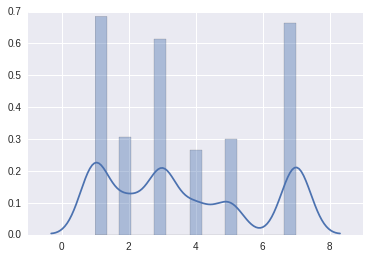

In [14]:
sns.distplot(y)

### ========== Question 1.2 ==========

*Tip - don't get stuck on this, move on after 10 mins or so (it's not critical)*

Plot a few datapoints. You'll need to understand and reshape the datapoints to do this. *Hint: try reading the [detailed description](http://www.inf.ed.ac.uk/teaching/courses/dme/html/satdoc.txt), it'll take you 2 minutes...`plt.imshow()` or `sns.heatmap()` (with an `ax.invert_yaxis()`) may also be handy ;)*

In [29]:
# Your code goes here
#plt.imshow(X[0])
row = X[:1].values.flatten()
row

array([  92.,  115.,  120.,   94.,   84.,  102.,  106.,   79.,   84.,
        102.,  102.,   83.,  101.,  126.,  133.,  103.,   92.,  112.,
        118.,   85.,   84.,  103.,  104.,   81.,  102.,  126.,  134.,
        104.,   88.,  121.,  128.,  100.,   84.,  107.,  113.,   87.])

In [30]:
spectrumsPerPixel = 4

In [35]:
#np.reshape(firstRow, (9, 4))
rows = row.shape[0] / spectrumsPerPixel
assert rows == int(rows)
shape = (int(rows), spectrumsPerPixel)
shape

(9, 4)

In [37]:
pixels = np.reshape(row, shape)
pixels

array([[  92.,  115.,  120.,   94.],
       [  84.,  102.,  106.,   79.],
       [  84.,  102.,  102.,   83.],
       [ 101.,  126.,  133.,  103.],
       [  92.,  112.,  118.,   85.],
       [  84.,  103.,  104.,   81.],
       [ 102.,  126.,  134.,  104.],
       [  88.,  121.,  128.,  100.],
       [  84.,  107.,  113.,   87.]])

In [38]:
imgSide = int(math.sqrt(pixels.shape[0]))
img = np.reshape(pixels, (imgSide, imgSide, pixels.shape[1]))
img

array([[[  92.,  115.,  120.,   94.],
        [  84.,  102.,  106.,   79.],
        [  84.,  102.,  102.,   83.]],

       [[ 101.,  126.,  133.,  103.],
        [  92.,  112.,  118.,   85.],
        [  84.,  103.,  104.,   81.]],

       [[ 102.,  126.,  134.,  104.],
        [  88.,  121.,  128.,  100.],
        [  84.,  107.,  113.,   87.]]])

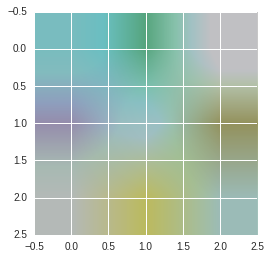

In [39]:
plt.imshow(img)

In [42]:
img2D = np.mean(img, axis=2)
img2D.shape

(3, 3)

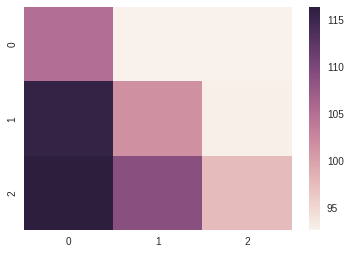

In [43]:
sns.heatmap(img2D)

### ========== Question 1.3 ==========

Read [this demonstration of k-means clustering assumptions](http://scikit-learn.org/0.17/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py) from the sklearn documentation. Get a feel for how to create and fit a k-means object and what the different arguments do.

Initialise a [k-means clustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) object with 6 clusters, and one other parameter that ensures you can reproduce your results (other arguments kept as default). Call the object `kmeans`. Use the `fit()` method to fit to the training data (`X` - the features of `landsat` created above)

**Be careful to fit `X` - only the features - not the class labels!**

In [190]:
seed=0

In [191]:
numberOfClusters = 6

In [192]:
# Your code goes here
kmeans = KMeans(n_clusters=numberOfClusters, random_state=seed)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [245]:
kmeans.fit(X) #y is not required, it is ignored. You are always going to get the clusters from 0 to n_clusters-1

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

### ========== Question 1.4 ==========

So, how well did that work? Are the classes well separated and form 6 nice clusters? The sklearn documentation gives a great introduction to k-means [here](http://scikit-learn.org/stable/modules/clustering.html#k-means). It describes what the algorithm is trying to minimise - the squared difference between datapoints and their closest cluster centre - a.k.a. the **inertia**. Lower inertia implies a better fit.

Since we have the true class labels in this case, we can use another metric: the [adjusted rand index](http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation). Understand what it is and roughly how it is calculated (try the [mathematical formulation on sklearn](http://scikit-learn.org/stable/modules/clustering.html#mathematical-formulation) or [on wikipedia](https://en.wikipedia.org/wiki/Rand_index)).

Print the `inertia` and the `adjusted_rand_score` of the kmeans object. The inertia is contained within the `kmeans` object you just fitted as a property. You need to use `y` and the cluster labels (another property of the `kmeans` object you just made), and are welcome to use the sklearn metrics function [adjusted_rand_score](http://scikit-learn.org/0.17/modules/generated/sklearn.metrics.adjusted_rand_score.html).

In [246]:
#actually the already computed labels and the predictions for X are the same thing
assert np.all(kmeans.labels_ == kmeans.predict(X))

In [247]:
# Your code goes here
print "current inertia is:"
fullDimsInertia = kmeans.inertia_
fullDimsInertia

current inertia is:


11321538.953870706

In [248]:
predictions = kmeans.predict(X)

In [249]:
assert len(np.unique(predictions)) == len(np.unique(y))

In [250]:
print "max predictions: %d" % predictions.max()
print "min predictions: %d" % predictions.min()
np.unique(predictions)

max predictions: 5
min predictions: 0


array([0, 1, 2, 3, 4, 5], dtype=int32)

In [251]:
print "max classes: %d" % y.max()
print "min classes: %d" % y.min()
np.unique(y)

max classes: 7
min classes: 1


array([1, 2, 3, 4, 5, 7])

We notice that the classes range from 1 to 7 without 6 while our kmeans library produces from zero to five

So we can just rename 0 to 7

In [252]:
predictions[predictions==0] = 7
np.unique(predictions)

array([1, 2, 3, 4, 5, 7], dtype=int32)

In [253]:
adjusted_rand_score(predictions, y)

0.53408858767871525

But since the adjusted rand score function is tolerant to these kind of difference we would get the same result if we had executed:

In [254]:
fullDim_adjustedRandScore = adjusted_rand_score(kmeans.labels_, y)
fullDim_adjustedRandScore

0.53408858767871525

### ========== Question 1.5 ==========

Let's have a look at the counts of the labels within each cluster. If the clustering has worked well, and the labels are inticative of genuine difference in the data, we should expect each cluster to have one dominant label.

Use `sns.countplot` on `kmeans.labels_` with a hue of `y` to get a plot that counts the number of instances within each cluster, and breaks them down by the class labels.

Below the plot, comment on:
1. How successful the clustering has been at separating data with different labels
1. Focussing on clusters, which are the best?
1. Focussing on labels, which are well identified by the clustering?
1. Which labels are the hardest to determine by the data point cluster assignment?

**Extension**: create a vector `y_labels` from `y` which has the names for the classes for a more interpretable plot with respect to the data

In [204]:
# Your code goes here
kmeans.predict(X[20:50])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5,
       5, 3, 5, 5, 5, 1, 1], dtype=int32)

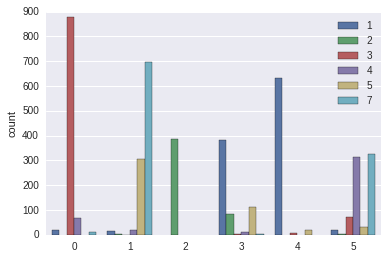

In [205]:
sns.countplot(kmeans.labels_, hue=y)

*Your answer goes here*
We see that

* cluster 0  <=> class 3
* cluster 1 <=> class 7
* cluster 2 <=> class 2
* cluster 3 <=> class 1
* cluster 4 <=> class 1
* cluster 5 <=> class 4 and class 7

#### How successful the clustering has been at separating data with different labels?

cluster 0 and cluster 2 correspond to class 3 and class 2 respectively, and seem that no other cluster contains these classes so there has been a good job on that part.

However class 1 is divided between cluster 3 and cluster 4 which means that clustering did a poor job on that class.

Cluster 5 contains both class 4 and class 7. So clustering cannot help up distinguish between these two classes. Class 7 is also represented by cluster 1.

Finally class 5 is not dominantly represented by any cluster. Cluster 1 contains most of the class 5 instances.

#### Focussing on clusters, which are the best?
The purest cluster wins here

Cluster 2 is the best because it has datas from class 2

Cluster 0 and cluster 4 are good but not quite as pure.

#### Focussing on labels, which are well identified by the clustering?
Here we are looking for a class that belongs mostly to one cluster rather than to be spread in many clusters.

Class 3 is well identified by the clustering because it is found in cluster 0 and a little bit in cluster 5.

Also class 2 is well identified even though you have a relatively good proportion belonging to cluster 3.

#### Which labels are the hardest to determine by the data point cluster assignment?
Here we see if the classes are confused/mixed with other classes.

For example we have class 4 and 7 being mixed in the same cluster 5

And also class 5 is mixed with class 7 in cluster 1

## Part 2: Dimensionality reduction

The landsat data is 36 dimensional, so we cannot visualise it, with respect to class, on a nice two dimensional plot. Additionally, as dimensionality increases, euclidean distance [becomes less meaningful](https://en.wikipedia.org/wiki/Curse_of_dimensionality#Distance_functions)...

Perhaps if we found a lower dimensional subspace the data lies upon, we could more easily distinguish the datapoints...

### ========== Question 2.1 ==========

Have a look at the [PCA example](http://scikit-learn.org/0.17/auto_examples/decomposition/plot_pca_iris.html) in the sklearn documentation. For more information about PCA and decomposition in general check out the sklearn [user guide on decomposition](http://scikit-learn.org/stable/modules/decomposition.html#pca).

We are going to project the data down to 2 dimensions and visualise it using PCA. 

1. Create `pca`, an instance of an [sklearn PCA object](http://scikit-learn.org/0.17/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA), setting n_components to 2. 
1. Create `X_2d` by using the pca method `fit_transform()` and supplying the features `X` to fit and transform to 2d.

In [206]:
# Your code goes here
pca = PCA(n_components=2, random_state=seed)
pca

PCA(copy=True, iterated_power='auto', n_components=2, random_state=0,
  svd_solver='auto', tol=0.0, whiten=False)

In [207]:
#X_2d = pca.fit_transform(X, y) #y is a useless parameters, does nothing
X_2d = pca.fit_transform(X)

### ========== Question 2.2 ==========

Let's visualise the data! Use a scatterplot and colour the datapoints by their class. You'll find [this example](http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html) very helpful to stea-I mean, adapt. 

Below the plot, comment on whether the data looks more or less seperable now. Do the data look like they will be confused by a k-means clustering in the same way now?

**Extension**: Unless the data is somehow magically perfectly seperable, you may want to try and describe the space a little better than a scatterplot (bacause points are plotted on top of one another). Try and make a plot that clarifies the location of the classes. We're actually interested in where the **density** is.

In [208]:
classes = np.unique(y)

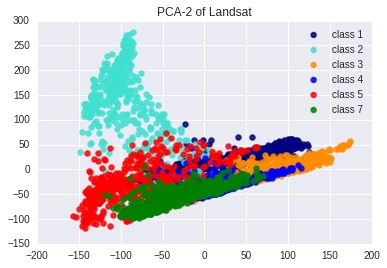

In [209]:
# Your code goes here
plt.figure()
colors = ['navy', 'turquoise', 'darkorange', "blue","red", "green"]
lineWidth = 2
targetNames = [ ('class ' + str(c)) for c in classes]

for color, curClass, targetName in zip(colors, classes, targetNames):
    plt.scatter(X_2d[y==curClass, 0], X_2d[y==curClass, 1],
                color=color,
                alpha=.8,
                lw=lineWidth,
                label=targetName)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA-2 of Landsat')

In [210]:
from scipy.stats import gaussian_kde

In [211]:
# x = np.random.normal(size=1000)
# y = x * 3 + np.random.normal(size=1000)

# # Calculate the point density
# xy = np.vstack([x,y])
# print xy.shape
# z = gaussian_kde(xy)(xy)
# z.shape
# z = gaussian_kde(X_2d.T)(X_2d.T)
# z.shape
# z

In [212]:
colors = ['navy', 'turquoise', 'darkorange', "blue","red", "green"]
targetNames = [ ('class ' + str(c)) for c in classes]

def getByClass(curClass):
    x1= X_2d[y==curClass, 0]
    x2= X_2d[y==curClass, 1]
    xx = np.vstack([x1,x2])
    z = gaussian_kde(xx)(xx)
    return x1,x2,z

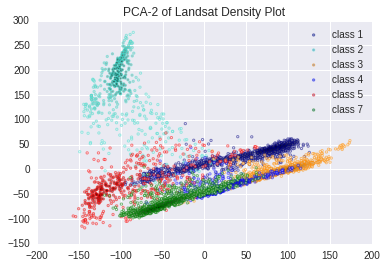

In [213]:
plt.figure()
#print z.shape

for color, curClass, targetName in zip(colors, classes, targetNames):
    x1,x2,z = getByClass(curClass)
    plt.scatter(x1, x2, c = z,
                #color=color,
                alpha=.5,
                lw=1,
                label=targetName, edgecolor=color, marker='.')
    #break #we are only plotting the first cluster for now
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA-2 of Landsat Density Plot')

*Your answer goes here*

Below the plot, comment on whether the data looks more or less seperable now. Do the data look like they will be confused by a k-means clustering in the same way now?

Yes the data are going to be confused by the k-means clustering because there are points that are far away from the centroids that we imagine the k-means clustering is going to converge eventually.

There are clusters that fall on top of each other and they are not spherical, therefore it is meant for k-means to fail.

Answer from solutions:  
Without performing a clustering, it's hard to say whether the data is more or less seperable. However, we can see 6 definite clusters with some overlap in the top plot, but it's not all that clear. The kernel density plot allows us to see better where the density lies. These clusters are not spherical and there is overlap, so k-means will always fail. See in particular the 'red soil' data points vs. the 'soil with vegetation stubble points. As expected, we see the 'cotton crop' data points are very distinct from the rest. 

### ========== Question 2.3 ==========

Let's find out whether it's easier to model the transformed data. Fit k-means to the transformed data and report the inertia and the adjusted rand index. Below, comment on whether it is better or worse.

In [255]:
# Your code goes here
kmeans = KMeans(n_clusters=numberOfClusters, random_state=seed)

In [256]:
kmeans.fit(X_2d)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [257]:
twoDim_inertia = kmeans.inertia_
twoDim_inertia

4807149.4037287105

In [258]:
twoDim_AdjustedRandScore = adjusted_rand_score(y, kmeans.labels_)
twoDim_AdjustedRandScore

0.32585393822658099

In [259]:
print twoDim_inertia
print "vs"
print fullDimsInertia

4807149.40373
vs
11321538.9539


In [260]:
print twoDim_AdjustedRandScore
print "vs"
print fullDim_adjustedRandScore

0.325853938227
vs
0.534088587679


From solutions:  
The fit is not as good as before, the adjusted rand index is lower. Note that we cannot compare the inertia with before. You should think about why.

*Your answer goes here*

The adjusted rand score is worse for the k-mean clustering

Since the inertia expresses the sum of the distances from the centroids and since now we have fewer dimensions it is expected that the distances are going to be lower. Therefore we cannot directly compare the two dimensional inertia with the inertia of full dimensionality

### ========== Question 2.4 ==========

The blobs in the 2 dimensional plot do look quite gaussian...try another classifier on the 2d data and see if it can perform better. What about using 3 principal component? 

Maybe there are subclasses within each class? Maybe increasing the number of clusters will increase your `adjusted_rand_score`.

Use the adjusted rand score for fair comparison. Why do you think it works better or worse? Discuss with your colleagues and lab tutors why you think you got better/worse/the same results.

In [239]:
# Your code goes here

def getAdjustedRandScore2D(numOfClusters):
    return adjusted_rand_score(KMeans(n_clusters=numOfClusters, random_state=seed).fit(X_2d).labels_, y)

In [240]:
numOfClustersCollection = range(6,20)

In [241]:
scores = []
for i in numOfClustersCollection:
    scores.append(
        getAdjustedRandScore2D(i)
    )
    
scores

[0.32585393822658099,
 0.3130683197410109,
 0.36561939137220023,
 0.40350251774634927,
 0.45175082170197517,
 0.40843889064120548,
 0.39117308517315352,
 0.3870879185275759,
 0.35377261403499555,
 0.34820398887544995,
 0.34481528966235564,
 0.32952704385401704,
 0.33172282122990349,
 0.29672738460886483]

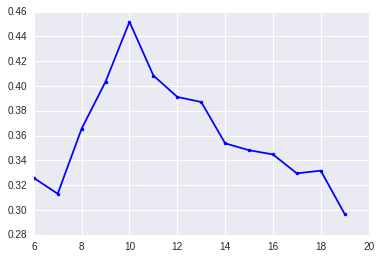

In [242]:
plt.plot(numOfClustersCollection, scores, 'b.-')

We notice that for the reduced 2 dimensionality data the adjusted rand score maximizes for 10 clusters. It seems that 10 clusters can better represent our six classes

In [243]:
def getAdjustedRandScore(numOfClusters):
    return adjusted_rand_score(KMeans(n_clusters=numOfClusters, random_state=seed).fit(X).labels_, y)

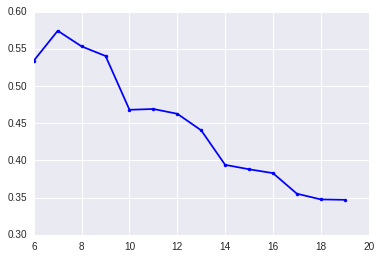

In [244]:
scores = []
for i in numOfClustersCollection:
    scores.append(
        getAdjustedRandScore(i)
    )
    
plt.plot(numOfClustersCollection, scores, 'b.-')

When looking the data at full dimensionality we see that we have a different pattern, the more we deviate from the original number of classes the worse we get the clusters to represent our data

It is interesting to notice that since our original data had this class 6 missing (mixture class of all types present), we actually have 7 classes and not 6 classes. k-means is able to perform better when clustering with 7 clusters

# Credits

Lab prepared by Lawrence Murray and Chris Williams, November 2008; revised Athina Spiliopoulou Nov 2009; revised Sean Moran Nov 2011; revised Boris Mitrovic Oct 2013; revised and converted to ipython notebook by James Owers and Agamemnon Krasoulis Oct 2016